# Testing HMC sampling from score function only

In [1]:
%pylab inline
from nsec.samplers import ScoreHamiltonianMonteCarlo
from nsec.datasets.swiss_roll import get_swiss_roll
import jax
import jax.numpy as jnp
import tensorflow_probability as tfp; tfp = tfp.experimental.substrates.jax

Populating the interactive namespace from numpy and matplotlib


In [2]:
dist = get_swiss_roll(.5)

In [3]:
init_samples = dist.sample(10000, seed=jax.random.PRNGKey(0))

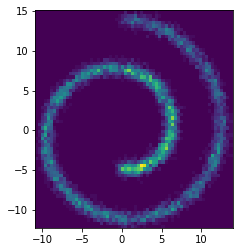

In [4]:
hist2d(init_samples[:,0], init_samples[:,1],64); gca().set_aspect('equal')

In [5]:
# Initialize the HMC transition kernel.
num_results = int(10e3)
num_burnin_steps = int(1e3)

kernel = ScoreHamiltonianMonteCarlo(
        target_score_fn=jax.grad(dist.log_prob),
        num_leapfrog_steps=5,
        num_delta_logp_steps=4,
        step_size=0.1)

In [6]:
samples, is_accepted = tfp.mcmc.sample_chain(
      num_results=num_results,
      num_burnin_steps=num_burnin_steps,
      current_state=init_samples[0],
      kernel=kernel,
      trace_fn=lambda _, pkr: pkr.is_accepted, 
      seed=jax.random.PRNGKey(1))

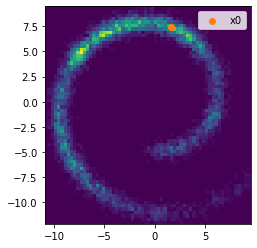

In [11]:
hist2d(samples[is_accepted,0], samples[is_accepted,1],64); gca().set_aspect('equal')
scatter(init_samples[0,0], init_samples[0,1], label='x0', color='C1')
legend()

In [12]:
# Same thing with proper HMC
kernel = tfp.mcmc.HamiltonianMonteCarlo(
        target_log_prob_fn=dist.log_prob,
        num_leapfrog_steps=5,
        step_size=0.1)

In [13]:
samples, is_accepted = tfp.mcmc.sample_chain(
      num_results=num_results,
      num_burnin_steps=num_burnin_steps,
      current_state=init_samples[0],
      kernel=kernel,
      trace_fn=lambda _, pkr: pkr.is_accepted, 
      seed=jax.random.PRNGKey(1))

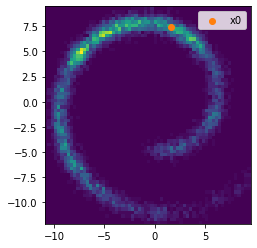

In [15]:
hist2d(samples[is_accepted,0], samples[is_accepted,1],64); gca().set_aspect('equal')
scatter(init_samples[0,0], init_samples[0,1], label='x0', color='C1')
legend()